In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [61]:
df_samplesize_runs = pd.read_json("avg_degree_samplesize_runs.json")
df_samplesize_runs['rounded_size'] = df_samplesize_runs["rounded_solution"].apply(lambda x: len(x))
df_samplesize_runs.drop(columns=["vertices", "edges", "given_solution", "rounded_solution"], inplace=True)

Text(1, -0.1, 'The number of samples range from 100 to 1000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability.')

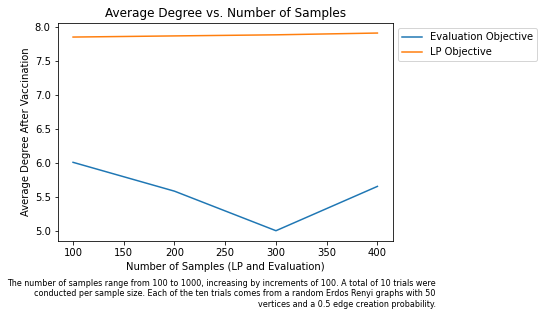

In [77]:
sns.lineplot(df_samplesize_runs, x="sample_size", y="evaluated_objective", label="Evaluation Objective")
sns.lineplot(df_samplesize_runs, x="sample_size", y="lp_objective", label="LP Objective")
plt.title("Average Degree vs. Number of Samples")
plt.ylabel("Average Degree After Vaccination")
plt.xlabel("Number of Samples (LP and Evaluation)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, "The number of samples range from 100 to 1000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability.", wrap=True, horizontalalignment='right', fontsize=8)

Text(0.5, 0, 'Number of Occurrences')

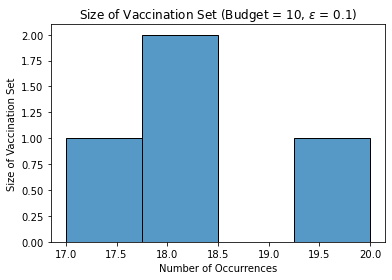

In [78]:
sns.histplot(df_samplesize_runs, x="rounded_size")
plt.title("Size of Vaccination Set (Budget = 10, $\epsilon$ = 0.1)")
plt.ylabel("Size of Vaccination Set")
plt.xlabel("Number of Occurrences")